In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit import assemble
from qiskit.circuit.library import RYGate, HGate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arccos,sqrt,log2,ceil,floor
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 

from qiskit.circuit.library import RYGate
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, circuit_drawer


Quantum Circuit After Decomposition


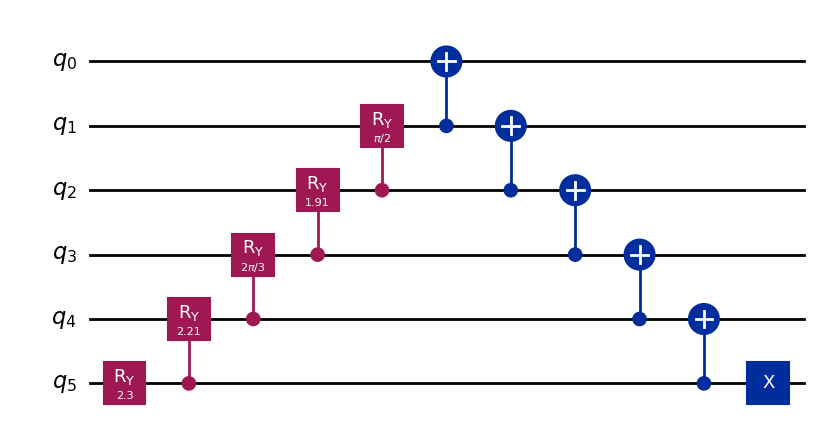

Circuit depth after decomposition: 11

Output Statevector


<IPython.core.display.Latex object>

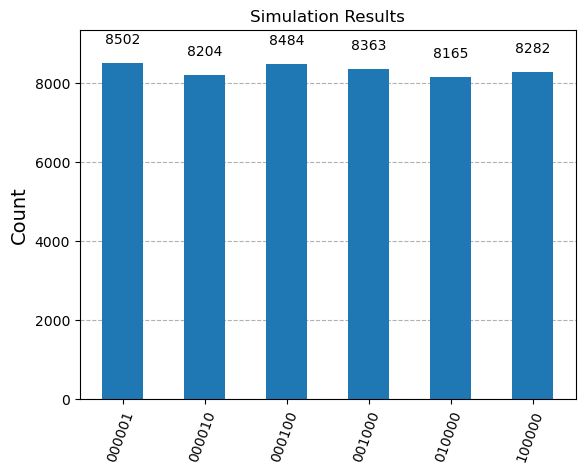

In [19]:

qc = QuantumCircuit(6)

 

theta_k5 = 2 * np.arccos(np.sqrt(1/6))
theta_k4 = 2 * np.arccos(np.sqrt(1/5)) 
theta_k3 = 2 * np.arccos(np.sqrt(1/4)) 
theta_k2 = 2 * np.arccos(np.sqrt(1/3)) 
theta_k1 = 2 * np.arccos(np.sqrt(1/2)) 


qc.ry(theta_k5,5) 



qc.cry(theta_k4,5,4)
qc.cry(theta_k3,4,3)
qc.cry(theta_k2,3,2)
qc.cry(theta_k1,2,1)

qc.cx(1,0)
qc.cx(5,1)
qc.cx(5,2)
qc.cx(5,3)
qc.cx(5,4)
qc.x(5)


#qc = qc.decompose()

print("\nQuantum Circuit After Decomposition")
display(qc.draw('mpl'))
print(f"Circuit depth after decomposition: {qc.depth()}")

# The rest of your simulation code will now work correctly
# 1. Get the statevector
sim = Aer.get_backend('statevector_simulator')
result = sim.run(qc).result()
output_state = result.get_statevector(qc)
 
print("\nOutput Statevector")
display(output_state.draw('latex'))

# 2. Check measurement probabilities
counts_sim = Aer.get_backend('qasm_simulator')
qc_measure = qc.copy()
qc_measure.measure_all()

# Running with a large number of shots to get good statistics
counts = counts_sim.run(qc_measure, shots=50000).result().get_counts()
display(plot_histogram(counts, title='Simulation Results'))

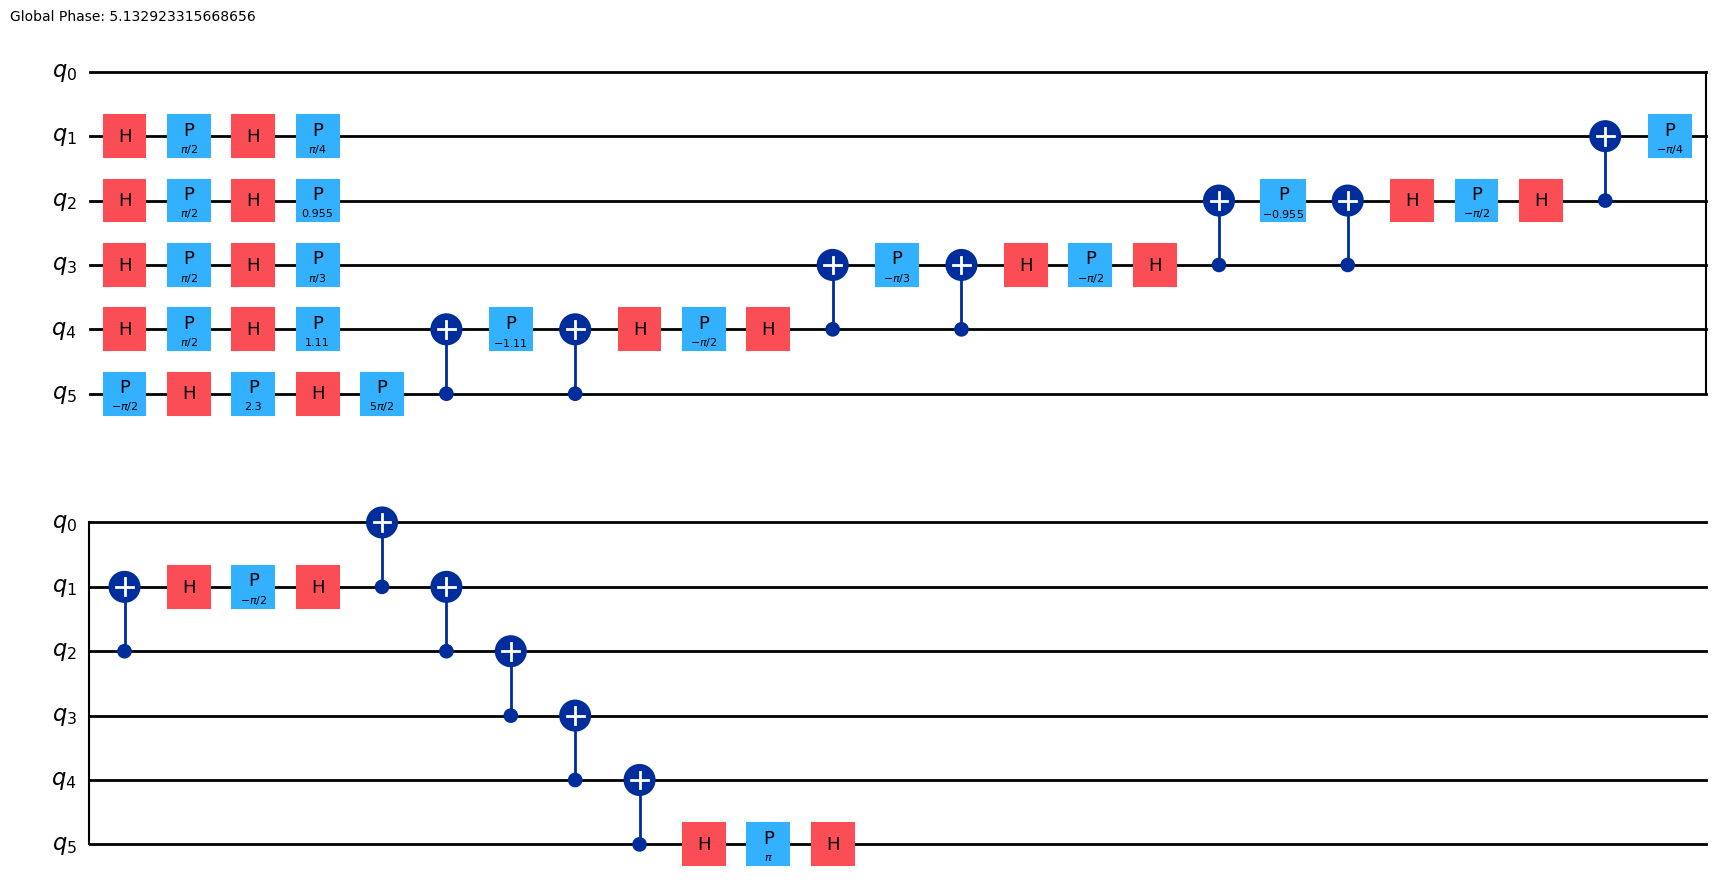

In [9]:
qc_transpile= transpile(qc, basis_gates=['h', 't', 'p', 'cx'], optimization_level=3)
qc_transpile.draw('mpl')


11